In [1]:
import os 
import copy
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from importlib import reload
from skimage import measure

import fxsdata
from fxsdata import fxs_mouse
from at_synapse_detection import dataAccess as da
from at_synapse_detection import SynapseDetection as syn

%matplotlib notebook
#%matplotlib inline



In [2]:
def calculate_zsize_distributions(blob_vol, query_vol):
    """
    blob_vol : 3d array - raw data
    """
    blob_vol = syn.getProbMap(blob_vol)
    blob_label_vol = measure.label(blob_vol > 0.9)
    blob_stats = measure.regionprops(blob_label_vol)
    #print("Number of blobs: ", len(blob_stats))
    
    query_bw = query_vol > 0.9
    query_bw = query_bw * -1 
    query_bw[query_bw==0] = 1 
    
    combinedvol = blob_label_vol * query_bw #blobs with synapses should have negative values 
    stats = measure.regionprops(blob_label_vol, combinedvol)

    z_list = [] 
    for stat in stats: 
        if stat.min_intensity < 0: 
            zsize = np.max(stat.coords[:, 2]) - np.min(stat.coords[:, 2]) + 1 
            z_list.append(zsize)
    
    return z_list

In [3]:
mouse_list = ['1ss', '2ss', '3ss', '4ss', '5ss', '6ss', '7ss', '22ss']
mouse_suffix = '_stacks'
layer_list = ['F000', 'F001', 'F002', 'F003']
gad_suffix = '_Geph.tif'
base_fp = '/Volumes/fxs_data/yi_mice/'


In [4]:
# loop through all the filepaths 
mouse_n = 0 
allmice = {} 
for mouse_n, mouse in enumerate(mouse_list):
    allmice[mouse] = {} 
    query_itr = 0 
    for layer_n, layer in enumerate(layer_list): 
        allmice[mouse][layer] = {} 
        gad_fn = os.path.join(base_fp, mouse + mouse_suffix, layer, mouse + gad_suffix)
        print(gad_fn) 
        for q_n in range(0, 3): 
            print("Starting Mouse-Layer-query", mouse, "-", layer, "-", str(q_n))
            q_fp = os.path.join(base_fp, mouse + mouse_suffix, 'results_' \
                                + mouse + '_inhibitory_fragX', layer, 'query_'+str(query_itr)+'.npy')
            query_itr = query_itr + 1 
            
            gadvol = da.imreadtiff(gad_fn)
            q_vol = np.load(q_fp)
            print(q_vol.shape)
            zlist = calculate_zsize_distributions(gadvol, q_vol)
            allmice[mouse][layer][q_n] = zlist

        

/Volumes/fxs_data/yi_mice/1ss_stacks/F000/1ss_Geph.tif
Starting Mouse-Layer-query 1ss - F000 - 0
(1040, 1388, 62)
Starting Mouse-Layer-query 1ss - F000 - 1
(1040, 1388, 62)
Starting Mouse-Layer-query 1ss - F000 - 2
(1040, 1388, 62)
/Volumes/fxs_data/yi_mice/1ss_stacks/F001/1ss_Geph.tif
Starting Mouse-Layer-query 1ss - F001 - 0
(1040, 1388, 62)
Starting Mouse-Layer-query 1ss - F001 - 1
(1040, 1388, 62)
Starting Mouse-Layer-query 1ss - F001 - 2
(1040, 1388, 62)
/Volumes/fxs_data/yi_mice/1ss_stacks/F002/1ss_Geph.tif
Starting Mouse-Layer-query 1ss - F002 - 0
(1040, 1388, 62)
Starting Mouse-Layer-query 1ss - F002 - 1
(1040, 1388, 62)
Starting Mouse-Layer-query 1ss - F002 - 2
(1040, 1388, 62)
/Volumes/fxs_data/yi_mice/1ss_stacks/F003/1ss_Geph.tif
Starting Mouse-Layer-query 1ss - F003 - 0
(1040, 1388, 62)
Starting Mouse-Layer-query 1ss - F003 - 1
(1040, 1388, 62)
Starting Mouse-Layer-query 1ss - F003 - 2
(1040, 1388, 62)
/Volumes/fxs_data/yi_mice/2ss_stacks/F000/2ss_Geph.tif
Starting Mouse-La

/Users/anish/anaconda3/envs/synapse_analysis/lib/python3.5/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in greater


Starting Mouse-Layer-query 22ss - F000 - 1
(1040, 1388, 32)
Starting Mouse-Layer-query 22ss - F000 - 2
(1040, 1388, 32)
/Volumes/fxs_data/yi_mice/22ss_stacks/F001/22ss_Geph.tif
Starting Mouse-Layer-query 22ss - F001 - 0
(1040, 1388, 32)
Starting Mouse-Layer-query 22ss - F001 - 1
(1040, 1388, 32)
Starting Mouse-Layer-query 22ss - F001 - 2
(1040, 1388, 32)
/Volumes/fxs_data/yi_mice/22ss_stacks/F002/22ss_Geph.tif
Starting Mouse-Layer-query 22ss - F002 - 0
(1040, 1388, 29)
Starting Mouse-Layer-query 22ss - F002 - 1
(1040, 1388, 29)
Starting Mouse-Layer-query 22ss - F002 - 2
(1040, 1388, 29)
/Volumes/fxs_data/yi_mice/22ss_stacks/F003/22ss_Geph.tif
Starting Mouse-Layer-query 22ss - F003 - 0
(1040, 1388, 29)
Starting Mouse-Layer-query 22ss - F003 - 1
(1040, 1388, 29)
Starting Mouse-Layer-query 22ss - F003 - 2
(1040, 1388, 29)


In [5]:
np.save('gephyrin_zlist.npy', allmice) 


<IPython.core.display.Javascript object>


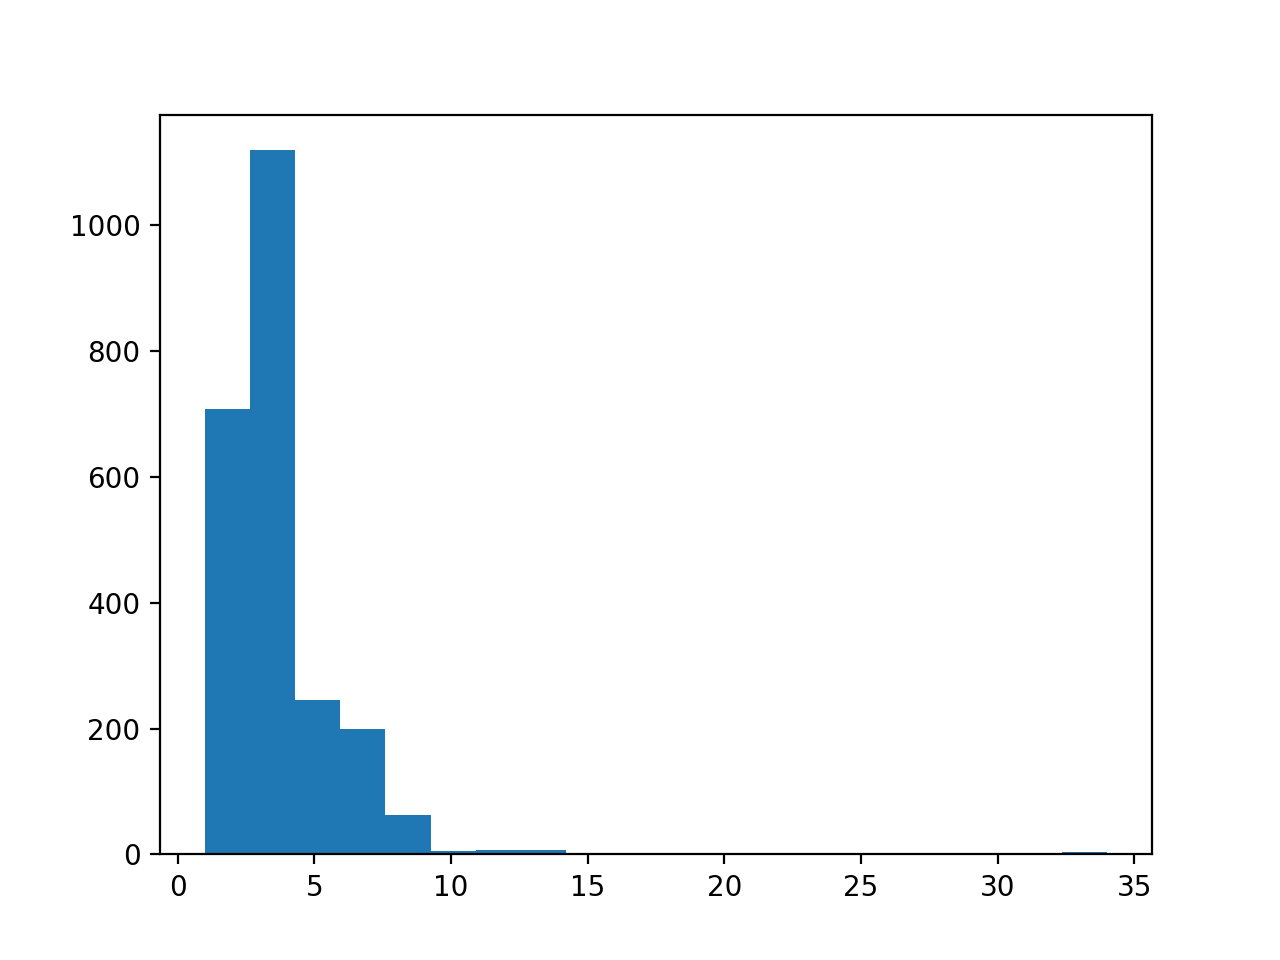

(array([7.080e+02, 1.119e+03, 2.450e+02, 1.990e+02, 6.200e+01, 6.000e+00,
        7.000e+00, 7.000e+00, 3.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 4.000e+00]),
 array([ 1.  ,  2.65,  4.3 ,  5.95,  7.6 ,  9.25, 10.9 , 12.55, 14.2 ,
        15.85, 17.5 , 19.15, 20.8 , 22.45, 24.1 , 25.75, 27.4 , 29.05,
        30.7 , 32.35, 34.  ]),
 <a list of 20 Patch objects>)

In [6]:
plt.figure()
plt.hist(allmice['2ss']['F000'][1], 20)

# Calculate Volume

In [ ]:
mouse_list

In [ ]:
layer

In [ ]:
# loop through all the filepaths 
mouse_n = 0 
allmice_volume = {} 

res_xy_nm = 100 
res_z_nm = 70 
volume_list = [] 

for mouse_n, mouse in enumerate(mouse_list):
    allmice_volume[mouse] = {} 
    query_itr = 0 

    dapi_mask_str_base = '/Volumes/fxs_data/yi_mice/dapi-masks/' + mouse + '_stacks'
    
    for layer_n, layer in enumerate(layer_list): 

        # Load DAPI mask
        dapi_mask_fn = os.path.join(dapi_mask_str_base, layer, mouse + '-DAPI-mask.tiff')
        dapi_mask = da.imreadtiff(dapi_mask_fn)
        dapi_mask = dapi_mask.astype(np.bool)
        combined_mask = np.logical_not(dapi_mask)
        
        volume_um3 = np.count_nonzero(combined_mask) * (res_xy_nm / 1000) * (res_xy_nm / 1000) * (res_z_nm / 1000)
        print("Mouse", mouse, "-", layer, "- Volume: ", volume_um3, "um3")
        allmice_volume[mouse][layer] = volume_um3
        volume_list.append(volume_um3)

        

In [ ]:
np.std(volume_list)

In [ ]:
np.mean(volume_list)

In [ ]:
np.save('volume_dict.npy', allmice_volume) 
